In [6]:
from sklearn.datasets import load_wine ## Data set import
import pandas as pd
# for data frame manipulation
import numpy as np
# for numerical analysis
from matplotlib import pyplot as plt# for visualization
from sklearn.preprocessing import LabelEncoder # for encoding of label in our dataset
from sklearn.ensemble import RandomForestClassifier
#for final classification
from sklearn.model_selection import train_test_split
# for spliting test and train data
from sklearn.metrics import confusion_matrix # for confusion matrix

Step#2 Loading the dataset and separating the dependent variable and independent variable in variables named as “dependentVaraible” and “independentVariables” respectively

In [7]:
winedataset = load_wine()
independentVariables=pd.DataFrame(winedataset.data,columns=winedataset.feature_names)
dependentVariable = pd.Categorical.from_codes (winedataset.target, winedataset.target_names)

In [8]:
independentVariables.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
print (independentVariables.shape)

(178, 13)


We have 178 records captured against 13 attributes.

In [10]:
print (independentVariables.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

We have 13 columns in the dataset. We could infer that:

All the features and numeric type and having their respective values in float
All the 13 features have 178 records and that is enough to conclude that we don’t have any missing values in any of the independent features.

# Let’s look into the target variable 

In [11]:
print ( "Dependent Variable",winedataset.target_names)

Dependent Variable ['class_0' 'class_1' 'class_2']


We can see that our dependentVaraible has got three classes, ‘class_0′ ,’class_1′  and ‘class_2’.We have three class classification problems.

# Let’s now create data frame having dependent variable and independent variables together

In [12]:
wineDataFrame = independentVariables.join(pd.Series(dependentVariable, name='class'))

In [13]:
wineDataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


# let’s create feature vector for every class and store it in a variable named “between_class_feature_means”

In [17]:
between_class_feature_means= pd.DataFrame(columns=winedataset.target_names)
for c, rows in wineDataFrame.groupby ('class') :
    between_class_feature_means[c] = rows.mean()
between_class_feature_means

/var/folders/lv/lrv6gpfd5l550w3079dzc5480000gn/T/ipykernel_65017/3816033505.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  between_class_feature_means[c] = rows.mean()


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


# Now, let’s  add the mean  into the “between_class_feature_means” to get  within the class scatter matrix.  

In [48]:
within_class_scatter_matrix = np.zeros((13,13))
for C, rows in wineDataFrame.groupby("class"):
    rows = rows.drop (['class'], axis=1)
    s = np.zeros( (13,13) )
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), between_class_feature_means[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)
within_class_scatter_matrix += s

feature_means = wineDataFrame.mean()
between_class_scatter_matrix= np.zeros((13,13))

for c in between_class_feature_means:
    n = len(wineDataFrame.loc[wineDataFrame['class']==c].index)
mc, m = between_class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
between_class_scatter_matrix += n * (mc- m).dot ((mc - m).T)
between_class_scatter_matrix

/var/folders/lv/lrv6gpfd5l550w3079dzc5480000gn/T/ipykernel_65017/4025758509.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = wineDataFrame.mean()


array([[ 1.12557198e+00,  7.33123859e+00,  5.18687410e-01,
         1.41253107e+01, -3.15383143e+00, -4.53047111e+00,
        -9.17183388e+00,  6.29527465e-01, -3.21472292e+00,
         1.71862649e+01, -2.01943973e+00, -6.82216925e+00,
        -8.59970512e+02],
       [ 7.33123859e+00,  4.77508859e+01,  3.37839002e+00,
         9.20030211e+01, -2.05419920e+01, -2.95085211e+01,
        -5.97393179e+01,  4.10032954e+00, -2.09385993e+01,
         1.11940071e+02, -1.31533076e+01, -4.44351416e+01,
        -5.60128459e+03],
       [ 5.18687410e-01,  3.37839002e+00,  2.39022145e-01,
         6.50924235e+00, -1.45335232e+00, -2.08773704e+00,
        -4.22657532e+00,  2.90099590e-01, -1.48141241e+00,
         7.91979486e+00, -9.30600601e-01, -3.14380009e+00,
        -3.96292627e+02],
       [ 1.41253107e+01,  9.20030211e+01,  6.50924235e+00,
         1.77264898e+02, -3.95788537e+01, -5.68549261e+01,
        -1.15101482e+02,  7.90022421e+00, -4.03430084e+01,
         2.15678193e+02, -2.53428604e

# Now, let’s  try to get the  linear discriminants value by computing

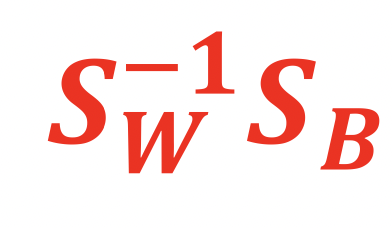


In [54]:
eig_values, eig_vectors= np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. Now, since we have got the eigenvalues and eigenvector, let’s sort the eigenvalues from highest to lowest and select the first k eigenvectors.

In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

In [57]:
pairs = [(np.abs (eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print (pair[0])

138.32431936545427
2.842170943040401e-14
1.0418019066656222e-14
8.172378460083773e-15
7.781065426813201e-15
7.781065426813201e-15
5.397976878090743e-15
2.6327803189067063e-15
2.6327803189067063e-15
2.0970425075722906e-15
5.768562136539767e-16
5.768562136539767e-16
7.604530749336805e-17


By just looking at the values obtained above it is difficult to determine variance explained by each component. Thus, let’s express it as a percentage.

In [59]:
eigen_value_sums= sum(eig_values)
print('Explained Variance')
for i, pair in enumerate (pairs):
    print ('Eigenvector {}: {}'.format(i,(pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.9999999999999998
Eigenvector 1: 2.0547152923495363e-16
Eigenvector 2: 7.531588887946526e-17
Eigenvector 3: 5.908128445940344e-17
Eigenvector 4: 5.625233120616733e-17
Eigenvector 5: 5.625233120616733e-17
Eigenvector 6: 3.9024062455924553e-17
Eigenvector 7: 1.9033387122266425e-17
Eigenvector 8: 1.9033387122266425e-17
Eigenvector 9: 1.5160331293818855e-17
Eigenvector 10: 4.170316660875204e-18
Eigenvector 11: 4.170316660875204e-18
Eigenvector 12: 5.497609374997577e-19


 Now, let’s formulate our linear function for the new feature space.

y=X.W

where X is a n×d matrix with n samples and d dimensions, and “y” is a n×k matrix with n samples and k ( k<n) dimensions. In other words, Y is composed of the LDA components (the new feature space).

In [61]:
#First, let's create a matrix W with the first two eigenvectors.
matrix_w = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
x_lda = np.array(independentVariables.dot(matrix_w))

Since, matplotlib cannot handle categorical variables directly and hence let’s encode them. Every class type will now be represented as a number. 

In [63]:
le = LabelEncoder()
y= le.fit_transform(wineDataFrame['class'])

Final, let’s now plot the data as a function of the two LDA components

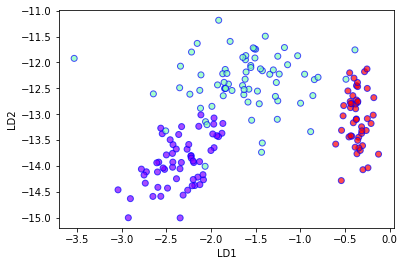

In [65]:
plt.xlabel ('LD1')
plt.ylabel ( 'LD2')
plt.scatter(x_lda[:,0],x_lda[:,1], c=y,cmap= 'rainbow', alpha=0.7,edgecolors='b')

In the above plot we can clearly see the separation between all the three classes

# Linear Discriminant Analysis implementation leveraging scikit-learn library

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sk_lda = LinearDiscriminantAnalysis()
x_lda= sk_lda.fit_transform(independentVariables,dependentVariable)

In [68]:
#we can access the following property to obtain the variance explained by each component.
sk_lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

From above output we could see that the LDA#1 covers 68.74% of total variance and LDA#2 covers 31.2% of total remaining variance.

Now, let’s visualize the output of Sklearn implementation

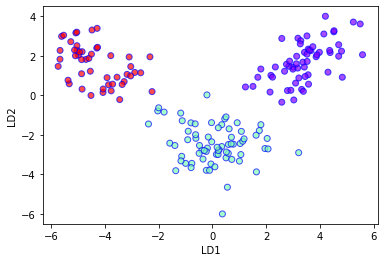

In [73]:
#Just like before, we plot the two LDA components
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(x_lda[:,0], x_lda[:,1], c=y,cmap='rainbow',alpha=0.7, edgecolors='b')